<a href="https://colab.research.google.com/github/mcagriaksoy/Forged_Original_Signature_Detector/blob/master/EEE7050_PRJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#github.com/mcagriaksoy

from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:

PATH = 'drive/My Drive/EEE7050-PRJ'  #change dir to your project folder

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')


In [0]:
train_cats_dir = os.path.join(train_dir, 'genuine')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'forged')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'genuine')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'forged')  # directory with our validation dog pictures


In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [0]:
print('total training genuine images:', num_cats_tr)
print('total training forged images:', num_dogs_tr)

print('total validation genuine images:', num_cats_val)
print('total validation forged images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

NameError: ignored

In [0]:
batch_size = 64
epochs = 32
IMG_HEIGHT = 100
IMG_WIDTH = 120

In [0]:
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
#image_gen_train = ImageDataGenerator(rescale=1./255)
image_gen_train = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        shear_range=0.1,
        fill_mode='nearest')

In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 653 images belonging to 2 classes.


In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')


Found 196 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


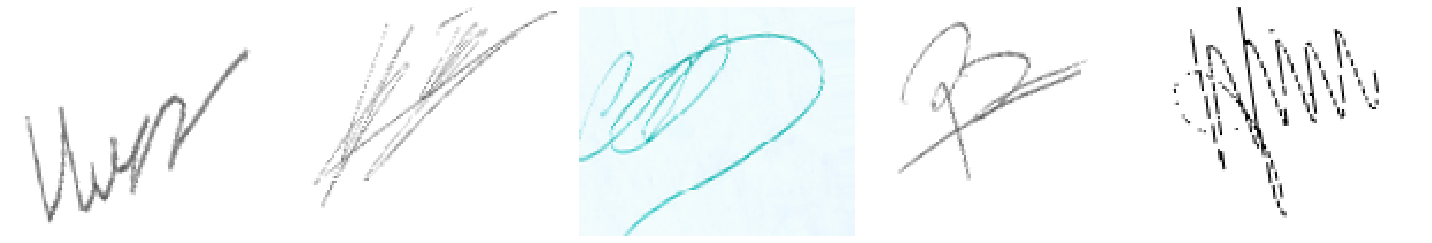

In [0]:
plotImages(sample_training_images[:5])


In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.1),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.1),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [0]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [0]:
model_new.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 120, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 60, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 60, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 15, 64)       

In [0]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/32
10/10 [==============================] - 17s 2s/step - loss: 0.8710 - acc: 0.4822 - val_loss: 0.6966 - val_acc: 0.5052
Epoch 2/32
10/10 [==============================] - 16s 2s/step - loss: 0.6991 - acc: 0.4873 - val_loss: 0.6948 - val_acc: 0.4948
Epoch 3/32
10/10 [==============================] - 17s 2s/step - loss: 0.6943 - acc: 0.5382 - val_loss: 0.6937 - val_acc: 0.4948
Epoch 4/32
10/10 [==============================] - 16s 2s/step - loss: 0.6901 - acc: 0.5433 - val_loss: 0.6994 - val_acc: 0.4948
Epoch 5/32
10/10 [==============================] - 15s 2s/step - loss: 0.6895 - acc: 0.5280 - val_loss: 0.7042 - val_acc: 0.4948
Epoch 6/32
10/10 [==============================] - 16s 2s/step - loss: 0.6861 - acc: 0.5416 - val_loss: 0.7463 - val_acc: 0.4948
Epoch 7/32
10/10 [==============================] - 17s 2s/step - loss: 0.6810 - acc: 0.5328 - val_loss: 0.7450 - val_acc: 0.4948
Epoch 8/32
10/10 [==============================] - 16s 2s/step - loss: 0.6656 - acc: 0.57

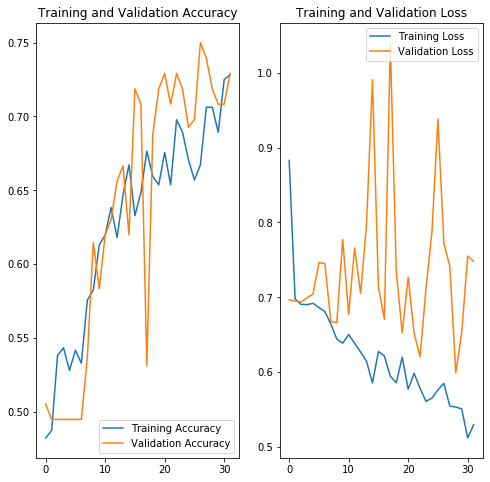

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:



test_img_loc = '/content/2.jpg'

test_image = image.load_img(test_img_loc, target_size = (100, 120))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
images = np.vstack([test_image])
classes = model_new.predict_classes(images, batch_size=10)
print (classes)
if classes[0][0] == 0:
  print('FORGED')
else:
  print('ORIGINAL')

[[1]]
ORIGINAL


# New Section